## Põhilised Pandase näited

See märkmik juhendab teid läbi mõningate väga lihtsate Pandase kontseptsioonide. Alustame tüüpiliste andmeteaduse teekide importimisega:


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Seeria

Seeria on nagu loend või ühemõõtmeline massiiv, kuid indeksiga. Kõik toimingud on indekseeritud vastavuses.


In [37]:
a = pd.Series(range(1,10))
b = pd.Series(["I","like","to","use","Python","and","Pandas","very","much"],index=range(0,9))
print(a,b)

0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
dtype: int64 0         I
1      like
2        to
3       use
4    Python
5       and
6    Pandas
7      very
8      much
dtype: object


Üks sagedasemaid seeria kasutusviise on **aegread**. Aegreas on indeksil eriline struktuur - tavaliselt kuupäevade või ajatemplite vahemik. Sellise indeksi saame luua `pd.date_range` abil.

Oletame, et meil on seeria, mis näitab iga päev ostetud toodete kogust, ja me teame, et igal pühapäeval peame ka endale ühe eseme võtma. Siin on, kuidas seda seeriat modelleerida:


Length of index is 366


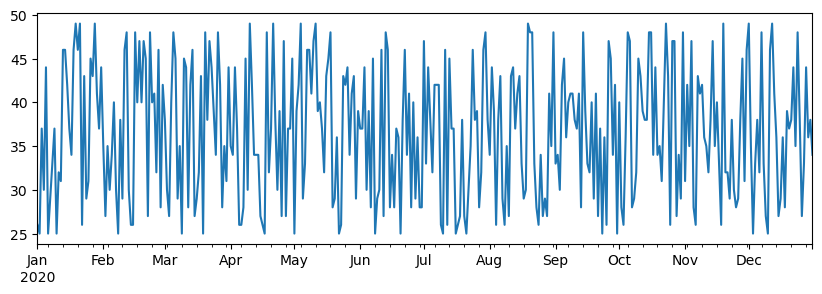

In [38]:
start_date = "Jan 1, 2020"
end_date = "Dec 31, 2020"
idx = pd.date_range(start_date,end_date)
print(f"Length of index is {len(idx)}")
items_sold = pd.Series(np.random.randint(25,50,size=len(idx)),index=idx)
items_sold.plot(figsize=(10,3))
plt.show()

In [39]:
additional_items = pd.Series(10,index=pd.date_range(start_date,end_date,freq="W"))
print(f"Additional items (10 item each week):\n{additional_items}")
total_items = items_sold+additional_items
print(f"Total items (sum of two series):\n{total_items}")

Additional items (10 item each week):
2020-01-05    10
2020-01-12    10
2020-01-19    10
2020-01-26    10
2020-02-02    10
2020-02-09    10
2020-02-16    10
2020-02-23    10
2020-03-01    10
2020-03-08    10
2020-03-15    10
2020-03-22    10
2020-03-29    10
2020-04-05    10
2020-04-12    10
2020-04-19    10
2020-04-26    10
2020-05-03    10
2020-05-10    10
2020-05-17    10
2020-05-24    10
2020-05-31    10
2020-06-07    10
2020-06-14    10
2020-06-21    10
2020-06-28    10
2020-07-05    10
2020-07-12    10
2020-07-19    10
2020-07-26    10
2020-08-02    10
2020-08-09    10
2020-08-16    10
2020-08-23    10
2020-08-30    10
2020-09-06    10
2020-09-13    10
2020-09-20    10
2020-09-27    10
2020-10-04    10
2020-10-11    10
2020-10-18    10
2020-10-25    10
2020-11-01    10
2020-11-08    10
2020-11-15    10
2020-11-22    10
2020-11-29    10
2020-12-06    10
2020-12-13    10
2020-12-20    10
2020-12-27    10
Freq: W-SUN, dtype: int64
Total items (sum of two series):
2020-01-01     NaN


Nagu näete, on meil siin probleeme, sest iganädalases seerias loetakse mainimata päevad puuduolevateks (`NaN`) ja `NaN` lisamine numbrile annab tulemuseks `NaN`. Õige tulemuse saamiseks peame seeriaid liites määrama `fill_value`:


2020-01-01    26.0
2020-01-02    25.0
2020-01-03    37.0
2020-01-04    30.0
2020-01-05    54.0
              ... 
2020-12-27    43.0
2020-12-28    44.0
2020-12-29    36.0
2020-12-30    38.0
2020-12-31    34.0
Length: 366, dtype: float64


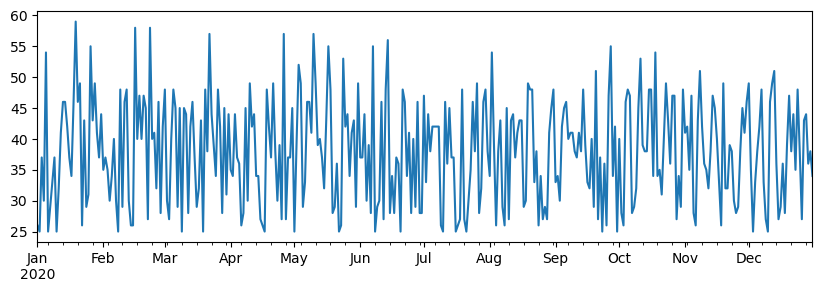

In [40]:
total_items = items_sold.add(additional_items,fill_value=0)
print(total_items)
total_items.plot(figsize=(10,3))
plt.show()

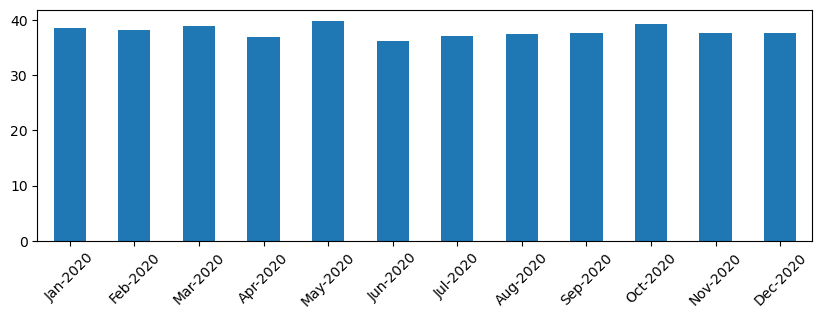

In [41]:
monthly = total_items.resample("1M").mean()
ax = monthly.plot(kind='bar',figsize=(10,3))
ax.set_xticklabels([x.strftime("%b-%Y") for x in monthly.index], rotation=45)
plt.show()

## DataFrame

DataFrame on sisuliselt samade indeksitega seeriate kogum. Me saame kombineerida mitu seeriat ühte DataFrame'i. Võttes arvesse ülalpool määratletud seeriad `a` ja `b`:


In [42]:
df = pd.DataFrame([a,b])
df

0     1   2    3       4    5       6     7     8
0  1     2   3    4       5    6       7     8     9
1  I  like  to  use  Python  and  Pandas  very  much

Me saame kasutada ka Series'e veergudena ja määrata veergude nimed sõnastiku abil:


In [43]:
df = pd.DataFrame({ 'A' : a, 'B' : b })
df

A       B
0  1       I
1  2    like
2  3      to
3  4     use
4  5  Python
5  6     and
6  7  Pandas
7  8    very
8  9    much

Sama tulemus on võimalik saavutada transponeerimise teel (ja seejärel veerge ümber nimetades, et vastata eelmisele näitele):


In [44]:
pd.DataFrame([a,b]).T.rename(columns={ 0 : 'A', 1 : 'B' })

A       B
0  1       I
1  2    like
2  3      to
3  4     use
4  5  Python
5  6     and
6  7  Pandas
7  8    very
8  9    much

**Veergude valimine** DataFrame'ist saab teha nii:


In [45]:
print(f"Column A (series):\n{df['A']}")
print(f"Columns B and A (DataFrame):\n{df[['B','A']]}")

Column A (series):
0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
Name: A, dtype: int64
Columns B and A (DataFrame):
        B  A
0       I  1
1    like  2
2      to  3
3     use  4
4  Python  5
5     and  6
6  Pandas  7
7    very  8
8    much  9


**Ridade valimine** filtriavaldiste alusel:


In [46]:
df[df['A']<5]

A     B
0  1     I
1  2  like
2  3    to
3  4   use

See, kuidas see töötab, on see, et avaldis `df['A']<5` tagastab boole'i seeria, mis näitab, kas avaldis on `True` või `False` iga seeria elemendi jaoks. Kui seeriat kasutatakse indeksina, tagastab see DataFrame'i ridade alamhulga. Seega ei ole võimalik kasutada suvalist Pythoni boole'i avaldist, näiteks `df[df['A']>5 and df['A']<7]` kirjutamine oleks vale. Selle asemel peaksite kasutama spetsiaalset `&` operatsiooni boole'i seerial:


In [47]:
df[(df['A']>5) & (df['A']<7)]

A    B
5  6  and

**Uute arvutatavate veergude loomine**. Me saame hõlpsasti luua oma DataFrame'ile uusi arvutatavaid veerge, kasutades intuitiivseid avaldisi. Allolev kood arvutab A hälbe selle keskmisest väärtusest.


In [48]:
df['DivA'] = df['A']-df['A'].mean()
df

A       B  DivA
0  1       I  -4.0
1  2    like  -3.0
2  3      to  -2.0
3  4     use  -1.0
4  5  Python   0.0
5  6     and   1.0
6  7  Pandas   2.0
7  8    very   3.0
8  9    much   4.0

Tegelikult toimub see, et me arvutame rea ja määrame selle seejärel vasakpoolsele küljele, luues teise veeru.


In [49]:
# WRONG: df['ADescr'] = "Low" if df['A'] < 5 else "Hi"
df['LenB'] = len(df['B']) # Wrong result

In [50]:
df['LenB'] = df['B'].apply(lambda x: len(x))
# or
df['LenB'] = df['B'].apply(len)
df

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6
5  6     and   1.0     3
6  7  Pandas   2.0     6
7  8    very   3.0     4
8  9    much   4.0     4

**Ridade valimine numbrite põhjal** saab teha, kasutades `iloc` konstruktsiooni. Näiteks, et valida DataFrame'ist esimesed 5 rida:


In [52]:
df.iloc[:5]

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6

**Rühmitamine** kasutatakse sageli tulemuse saamiseks, mis sarnaneb *pivot-tabelitega* Excelis. Oletame, et soovime arvutada veeru `A` keskmise väärtuse iga antud `LenB` numbri jaoks. Siis saame rühmitada oma DataFrame'i `LenB` järgi ja kutsuda `mean`:


In [53]:
df.groupby(by='LenB').mean()

A      DivA
LenB                    
1     1.000000 -4.000000
2     3.000000 -2.000000
3     5.000000  0.000000
4     6.333333  1.333333
6     6.000000  1.000000

Kui peame arvutama grupi keskmise ja elementide arvu, siis saame kasutada keerukamat `aggregate` funktsiooni:


In [58]:
df.groupby(by='LenB') \
 .aggregate({ 'DivA' : len, 'A' : lambda x: x.mean() }) \
 .rename(columns={ 'DivA' : 'Count', 'A' : 'Mean'})

Count      Mean
LenB                 
1         1  1.000000
2         1  3.000000
3         2  5.000000
4         3  6.333333
6         2  6.000000

## Printimine ja visualiseerimine

Andmeteadlane peab sageli andmeid uurima, seega on oluline osata neid visualiseerida. Kui DataFrame on suur, tahame tihti lihtsalt veenduda, et teeme kõik õigesti, printides välja esimesed paar rida. Seda saab teha, kutsudes välja `df.head()`. Kui käitate seda Jupyter Notebookis, prinditakse DataFrame välja kenasti tabeli kujul.


In [59]:
df.head()

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6

Oleme näinud ka `plot` funktsiooni kasutamist, et visualiseerida mõningaid veerge. Kuigi `plot` on väga kasulik paljude ülesannete jaoks ja toetab erinevaid graafikutüüpe läbi `kind=` parameetri, saate alati kasutada algupärast `matplotlib` teeki, et luua midagi keerukamat. Andmete visualiseerimist käsitleme põhjalikult eraldi kursuse tundides.


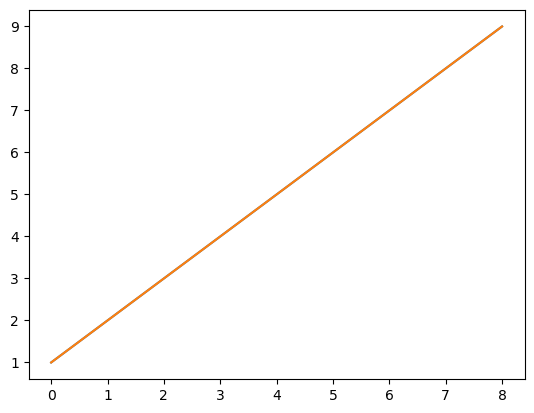

In [61]:
df['A'].plot()
plt.show()

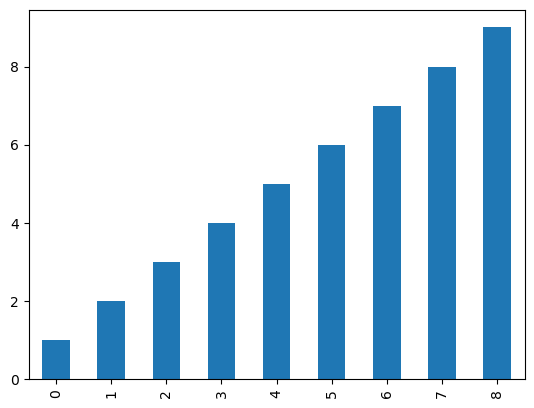

In [63]:
df['A'].plot(kind='bar')
plt.show()

See ülevaade hõlmab Pandase kõige olulisemaid kontseptsioone, kuid teek on väga mitmekülgne ja sellega tehtavate võimaluste piirid puuduvad! Rakendame nüüd seda teadmist konkreetse probleemi lahendamiseks.



---

**Lahtiütlus**:  
See dokument on tõlgitud AI tõlketeenuse [Co-op Translator](https://github.com/Azure/co-op-translator) abil. Kuigi püüame tagada täpsust, palume arvestada, et automaatsed tõlked võivad sisaldada vigu või ebatäpsusi. Algne dokument selle algses keeles tuleks pidada autoriteetseks allikaks. Olulise teabe puhul soovitame kasutada professionaalset inimtõlget. Me ei vastuta selle tõlke kasutamisest tulenevate arusaamatuste või valesti tõlgenduste eest.
